## Quantum Architecture Analysis  

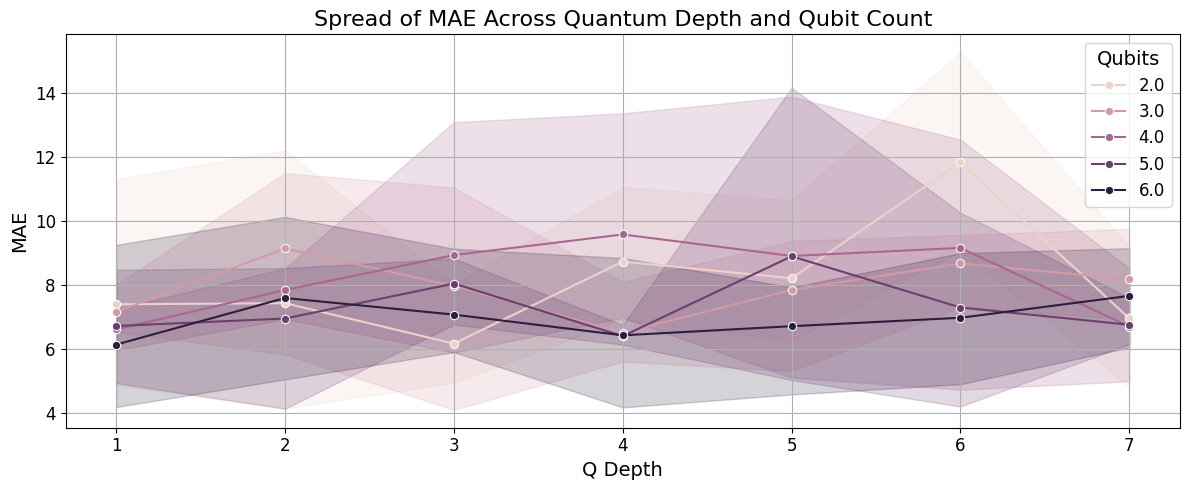

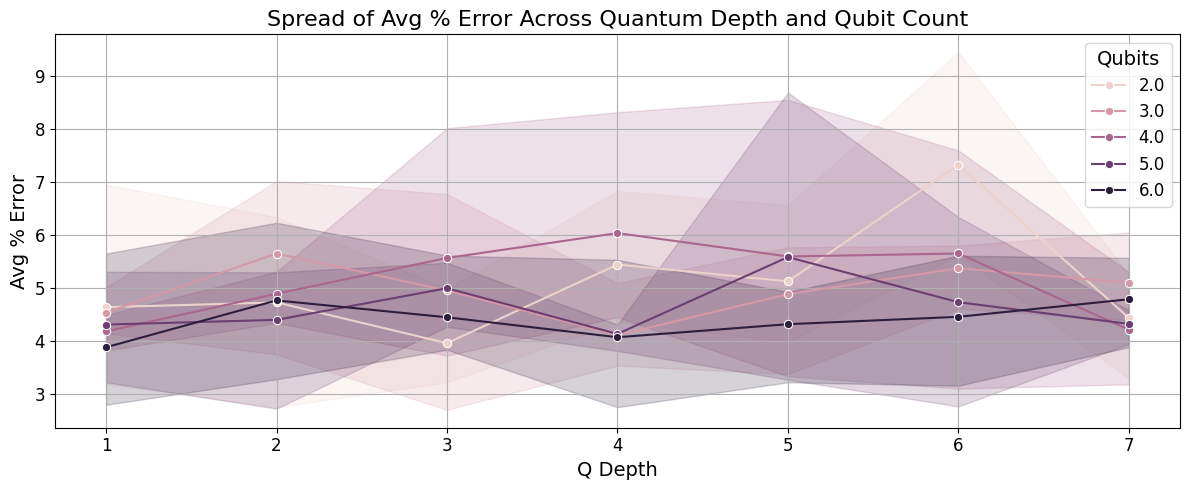

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data (replace this path with your actual Excel file path if needed)
file_path = "./quantum layer optimization/qml_optimization_quantum_layer.xlsx"

# Load the data
df = pd.read_excel(file_path)

# Convert "-" to NaN and cast columns to numeric
for col in ["Qubits", "Q Depth", "Rotation Params", "MAE", "Avg % Error"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter to only rows where quantum was used
df_quantum = df[df["Use Quantum"] == True]

# Create plots to visualize trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_quantum, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("Spread of MAE Across Quantum Depth and Qubit Count",fontsize=16)
plt.xlabel("Q Depth", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title="Qubits", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_quantum, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Spread of Avg % Error Across Quantum Depth and Qubit Count",fontsize=16)
plt.xlabel("Q Depth", fontsize=14)
plt.ylabel("Avg % Error", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title="Qubits", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


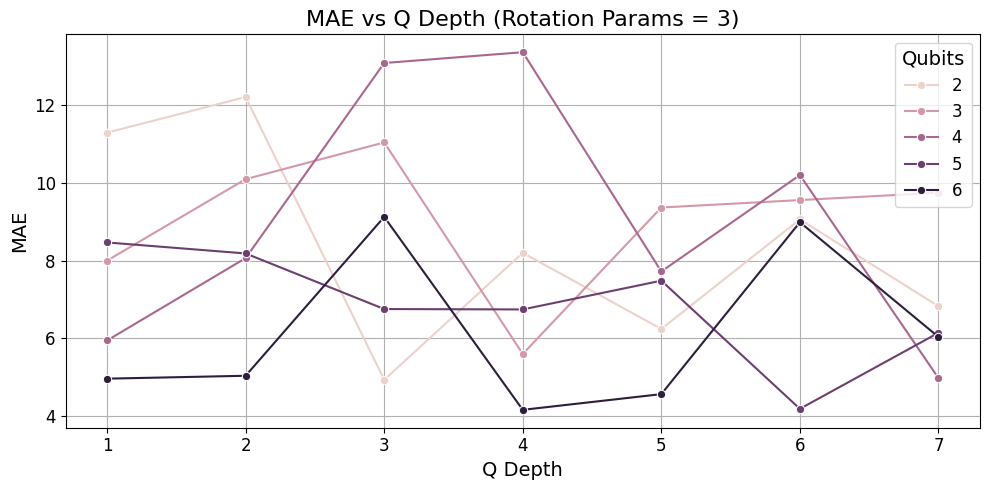

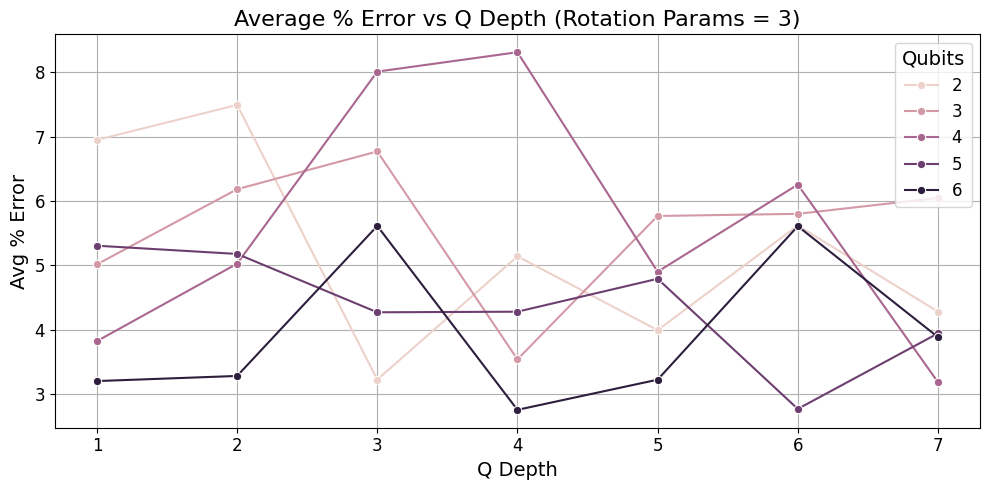

In [2]:


# Filter only rows where Rotation Params == 3
df_filtered = df[df["Rotation Params"] == 3]

# Drop rows with missing or invalid Qubits or Q Depth
df_filtered = df_filtered[(df_filtered["Qubits"] != "-") & (df_filtered["Q Depth"] != "-")]
df_filtered["Qubits"] = df_filtered["Qubits"].astype(int)
df_filtered["Q Depth"] = df_filtered["Q Depth"].astype(int)

# Plot MAE vs Q Depth for each Qubit value
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_filtered, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("MAE vs Q Depth (Rotation Params = 3)",fontsize=16)
plt.xlabel("Q Depth", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title="Qubits", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# Plot Avg % Error vs Q Depth for each Qubit value
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_filtered, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Average % Error vs Q Depth (Rotation Params = 3)",fontsize=16)
plt.xlabel("Q Depth", fontsize=14)
plt.ylabel("Avg % Error", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title="Qubits", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
# Show top 3 configurations with lowest average % error for Rotation Params = 3
top3 = df_filtered.sort_values(by="Avg % Error").head(3)
print("🔎 Top 3 configurations with lowest Avg % Error (Rotation Params = 3):")
print(top3[["Qubits", "Q Depth", "MAE", "Avg % Error", "Train Loss", "Validation Loss", "Notes"]])


🔎 Top 3 configurations with lowest Avg % Error (Rotation Params = 3):
    Qubits  Q Depth       MAE  Avg % Error  Train Loss  Validation Loss  \
96       6        4  4.159879     2.755969    0.000271         0.001034   
81       5        6  4.186061     2.770360    0.000284         0.001653   
63       4        7  4.976660     3.186354    0.000251         0.001499   

                                                Notes  
96  Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  
81  Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  
63  Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  


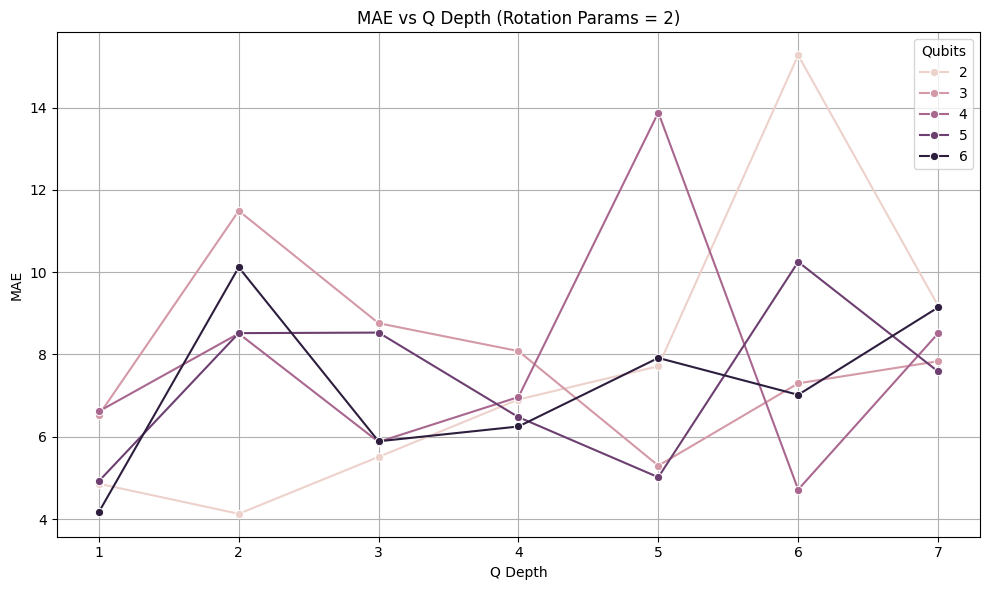

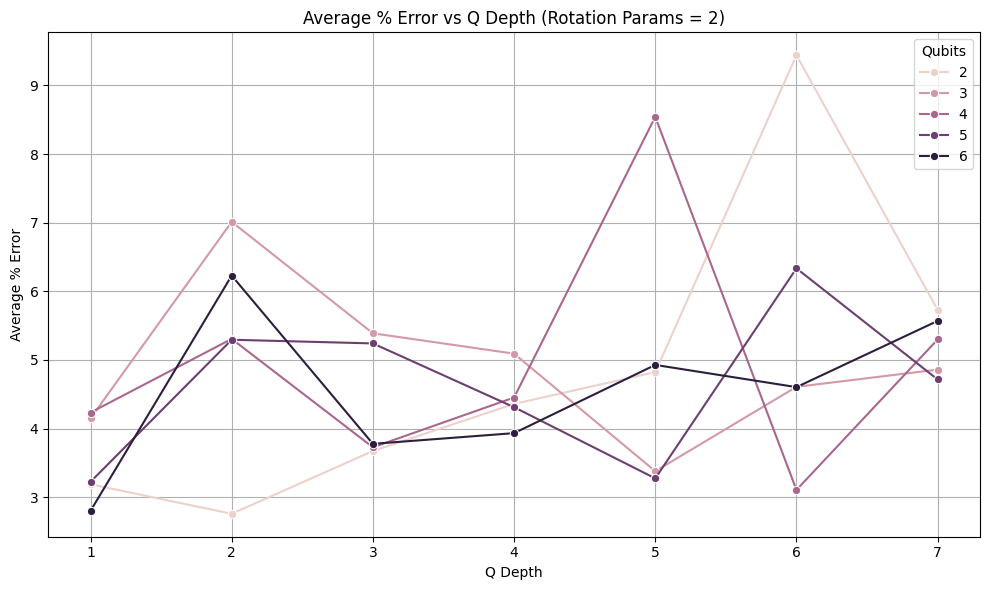

In [4]:


# Filter only rows where Rotation Params == 3
df_filtered = df[df["Rotation Params"] == 2]

# Drop rows with missing or invalid Qubits or Q Depth
df_filtered = df_filtered[(df_filtered["Qubits"] != "-") & (df_filtered["Q Depth"] != "-")]
df_filtered["Qubits"] = df_filtered["Qubits"].astype(int)
df_filtered["Q Depth"] = df_filtered["Q Depth"].astype(int)

# Plot MAE vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("MAE vs Q Depth (Rotation Params = 2)")
plt.xlabel("Q Depth")
plt.ylabel("MAE")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Avg % Error vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Average % Error vs Q Depth (Rotation Params = 2)")
plt.xlabel("Q Depth")
plt.ylabel("Average % Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Show top 3 configurations with lowest average % error for Rotation Params = 3
top3 = df_filtered.sort_values(by="Avg % Error").head(3)
print("🔎 Top 3 configurations with lowest Avg % Error (Rotation Params = 2):")
print(top3[["Qubits", "Q Depth", "MAE", "Avg % Error", "Train Loss", "Validation Loss", "Notes"]])


🔎 Top 3 configurations with lowest Avg % Error (Rotation Params = 2):
    Qubits  Q Depth       MAE  Avg % Error  Train Loss  Validation Loss  \
5        2        2  4.127734     2.758767    0.000306         0.001014   
86       6        1  4.169684     2.801116    0.000240         0.001592   
59       4        6  4.715756     3.106500    0.000283         0.002094   

                                                Notes  
5   Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  
86  Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  
59  Quantum sim: \nGridSearch | Qubits=2, Depth=1,...  


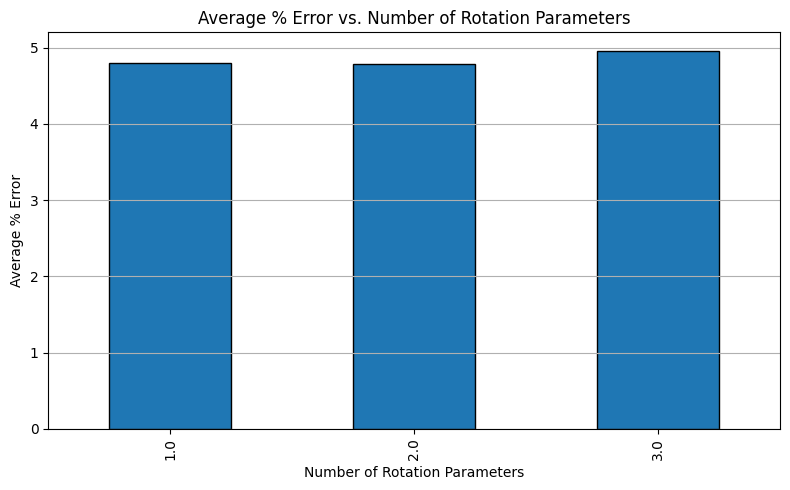

In [6]:

# Ensure numeric fields are correctly typed
df["Rotation Params"] = pd.to_numeric(df["Rotation Params"], errors="coerce")
df["Avg % Error"] = pd.to_numeric(df["Avg % Error"], errors="coerce")

# Group by n_rot_params and compute average of Avg % Error
avg_error_by_rot = df.groupby("Rotation Params")["Avg % Error"].mean().dropna()

# Plotting
plt.figure(figsize=(8, 5))
avg_error_by_rot.plot(kind="bar", edgecolor="black")
plt.title("Average % Error vs. Number of Rotation Parameters")
plt.xlabel("Number of Rotation Parameters")
plt.ylabel("Average % Error")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


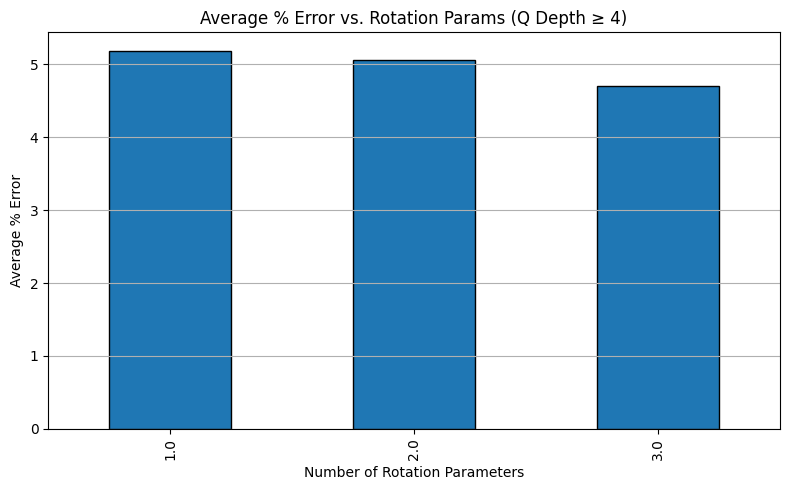

In [7]:
# Ensure numeric fields are correctly typed
df["Rotation Params"] = pd.to_numeric(df["Rotation Params"], errors="coerce")
df["Avg % Error"] = pd.to_numeric(df["Avg % Error"], errors="coerce")
df["Q Depth"] = pd.to_numeric(df["Q Depth"], errors="coerce")

# Filter for Q Depth >= 4
df_filtered = df[df["Q Depth"] >= 4]

# Group by Rotation Params and compute average of Avg % Error
avg_error_by_rot_filtered = df_filtered.groupby("Rotation Params")["Avg % Error"].mean().dropna()

# Plotting
plt.figure(figsize=(8, 5))
avg_error_by_rot_filtered.plot(kind="bar", edgecolor="black")
plt.title("Average % Error vs. Rotation Params (Q Depth ≥ 4)")
plt.xlabel("Number of Rotation Parameters")
plt.ylabel("Average % Error")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


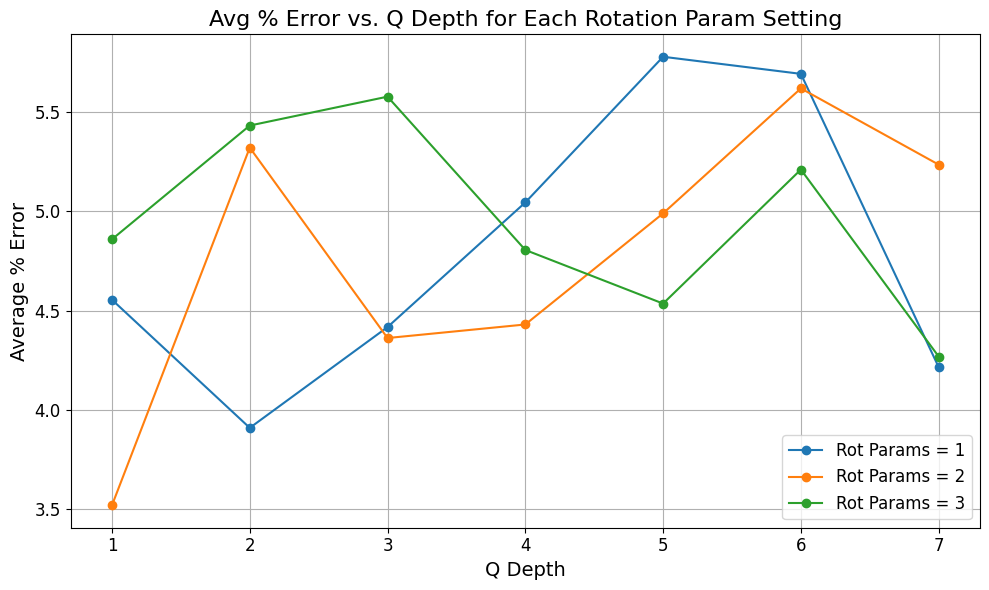

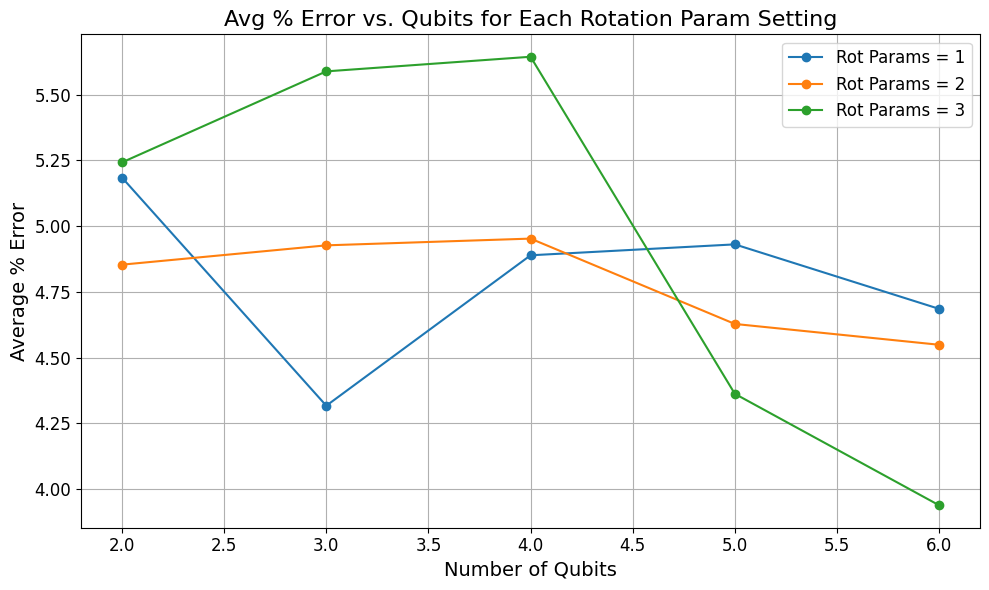

In [8]:

# Ensure columns are numeric where needed
df["Rotation Params"] = pd.to_numeric(df["Rotation Params"], errors="coerce")
df["Q Depth"] = pd.to_numeric(df["Q Depth"], errors="coerce")
df["Qubits"] = pd.to_numeric(df["Qubits"], errors="coerce")
df["Avg % Error"] = pd.to_numeric(df["Avg % Error"], errors="coerce")

# Drop rows with NaNs in critical fields
df_clean = df.dropna(subset=["Rotation Params", "Q Depth", "Qubits", "Avg % Error"])

# === Group and analyze ===

# Group 1: Avg % Error by Rotation Params and Q Depth
grouped_by_depth = df_clean.groupby(["Rotation Params", "Q Depth"])["Avg % Error"].mean().reset_index()

# Group 2: Avg % Error by Rotation Params and Qubits
grouped_by_qubits = df_clean.groupby(["Rotation Params", "Qubits"])["Avg % Error"].mean().reset_index()

# === Plot 1: Line plot for Q Depth ===
plt.figure(figsize=(10, 6))
for rot in sorted(grouped_by_depth["Rotation Params"].unique()):
    sub_df = grouped_by_depth[grouped_by_depth["Rotation Params"] == rot]
    plt.plot(sub_df["Q Depth"], sub_df["Avg % Error"], marker="o", label=f"Rot Params = {int(rot)}")
plt.title("Avg % Error vs. Q Depth for Each Rotation Param Setting", fontsize=16)
plt.xlabel("Q Depth", fontsize=14)
plt.ylabel("Average % Error", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# === Plot 2: Line plot for Qubits ===
plt.figure(figsize=(10, 6))
for rot in sorted(grouped_by_qubits["Rotation Params"].unique()):
    sub_df = grouped_by_qubits[grouped_by_qubits["Rotation Params"] == rot]
    plt.plot(sub_df["Qubits"], sub_df["Avg % Error"], marker="o", label=f"Rot Params = {int(rot)}")
plt.title("Avg % Error vs. Qubits for Each Rotation Param Setting", fontsize=16)
plt.xlabel("Number of Qubits", fontsize=14)
plt.ylabel("Average % Error", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

As expected higher qubits and number of layers or depth of the quantum circuit leads to better results until a threshold,
with 6 qubits and 4 depth of the layer for a full rotational gate (rotation = 3) being the best outcome of ~2.7% error. 

We can see how the layer is better encoding and finding useful relations of the data as the layers / qubits increase through the analysis of how the error changes across the rotational parameters. We see that at first the single rotation in X out performs the others in smaller quantum circuits but as they increase 2 and then 3 (full rotational gate) becomes preferable. This indicates that the model is properly encoding the trends in data once the threshold is met.